In [1]:
with open('C:/Users/leandro/Desktop/posts.json','r', encoding='utf8') as f:
    x = f.readlines()


In [2]:
import pandas as pd
import re

In [3]:
data = pd.read_json('C:/Users/leandro/Desktop/igposts.json', lines=True) 

In [4]:
data=data.fillna(0)

In [5]:
post=data[['owner_id','text','date','is_video','like_count','comment_count','video_view_count']]

In [6]:
import warnings 
warnings.filterwarnings('ignore')

In [7]:
post['like_count'] = post['like_count'].astype(str)

In [8]:
post['comment_count'] = post['comment_count'].astype(str)

In [9]:
post['video_view_count'] = post['video_view_count'].astype(str)

In [10]:
post['date'] = post['date'].astype(str)

In [11]:
post['text'] = post['text'].astype(str)

In [12]:
def clean(x):
    val = re.findall( '\d{1,}', x)
    return val[0]

In [13]:
post['like_count']=list(map(clean, post['like_count']))

In [14]:
post['comment_count']=list(map(clean, post['comment_count']))

In [15]:
post['video_view_count']=list(map(clean, post['video_view_count']))

In [16]:
post['date']=list(map(clean, post['date']))

In [17]:
def special(x):
    value = re.findall( '@', x)
    return len(value)

In [18]:
post['link_count']=list(map(special, post['text']))

In [19]:
def hashtag(x):
    value = re.findall( '#', x)
    return len(value)

In [20]:
post['hashtag_count']=list(map(hashtag, post['text']))

In [21]:
post['like_count']=post['like_count'].astype(int)

In [22]:
post['comment_count']=post['comment_count'].astype(int)

In [23]:
post['video_view_count']=post['video_view_count'].astype(int)

In [24]:
post['text'] = post['text'].str.lower()

In [25]:
post['text'] = list(map(lambda x: re.sub('[?|!|\'|"|,|\n|\|.]','',x),post['text']))

In [26]:
post['hashtag']=list(post.text.str.findall(r'#[A-z]+'))

In [27]:
post['links']=list(post.text.str.findall(r'@[A-z]+'))

In [28]:
post['hashtag']=post['hashtag'].astype(str).str.strip('[]')

In [29]:
post['links']=post['links'].astype(str)

In [30]:
post['links']=post['links'].astype(str).str.strip('[]')

In [31]:
post['date']=post['date'].astype(int)

In [32]:
import datetime

In [33]:
post['day_post']=list(map(lambda x: datetime.datetime.fromtimestamp(x).strftime('%Y-%m-%d'),post['date']))

In [34]:
post['time_post']=list(map(lambda x: datetime.datetime.fromtimestamp(x).strftime('%H'),post['date']))

In [35]:
post['time_post']=post['time_post'].astype(int)

In [36]:
post=post.drop(['date'], axis=1)

In [37]:
post['day_post'] = pd.to_datetime(post['day_post'], errors='coerce')

In [38]:
post['day_post']=post['day_post'].dt.day_name()

In [39]:
def f(x):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Eve'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'

In [40]:
post['time_post']=post['time_post'].apply(f)

In [76]:
post.head(3)

,owner_id,text,is_video,like_count,comment_count,video_view_count,link_count,hashtag_count,hashtag,links,day_post,time_post
0,3532778,so who can relate when cooking with their mumm...,False,35123,316,0,2,1,'#mothersday',"'@jamieolivercookeryschool', '@sally__oliver'",Sunday,Late Night
1,3532778,potato gnocchi light fluffy pillows of joy thi...,False,34801,257,0,0,0,,,Monday,Noon
2,3532778,this is how you make the perfect scrambled egg...,True,141359,3816,1515096,1,2,"'#kitchenbuddies', '#mothersday'",,Saturday,Early Morning


In [53]:
average_hashtag = round(post['hashtag_count'].mean())
print('Average hashtag per publication:',average_hashtag)

Average hashtag per publication: 3


In [54]:
average_link = round(post['link_count'].mean())
print('Average external link per publication:',average_link)

Average external link per publication: 1


In [51]:
max_likes=round(post['like_count'].max())
print('Maximum likes per publication:' , max_likes)

Maximum likes per publication: 898782


In [52]:
max_comment=round(post['comment_count'].max())
print('Maximun comments per publication:' ,max_comment)

Maximun comments per publication: 13416


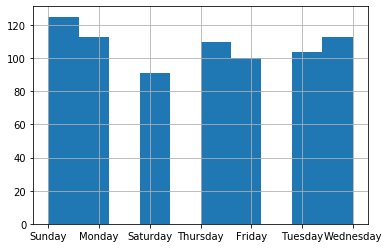

In [48]:
post['day_post'].hist()

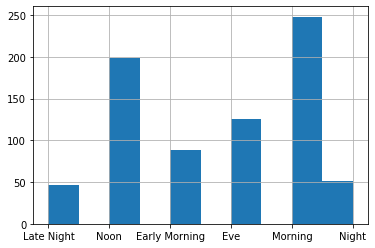

In [49]:
post['time_post'].hist()

In [71]:
time_post=pd.DataFrame(post['time_post'].value_counts())


In [73]:
time_post['%_post_time']=list(map(lambda x: (x / (sum(time_post['time_post'])))*100,time_post['time_post']))

In [74]:
time_post.head(5)

,time_post,%_post_time
Morning,248,32.804233
Noon,198,26.190476
Eve,125,16.534392
Early Morning,88,11.640212
Night,51,6.746032


In [79]:
sum(time_post['time_post'])

756